In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from astropy.table import Table

In [78]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [79]:
ref = Table.read('/home/aalvarez/Work/Data/SC8/PHZPRD_D3_3_NOMINAL_20211006T095754-37VOZ8CE-20211006-095828-003/ProductionInputEcdmHandler/star_reference_sample_dir.dir/phot.fits', hdu=1)

In [80]:
bands = ['euclid/VIS', 'euclid/Y', 'euclid/H', 'euclid/J', 'lsst/u', 'lsst/g', 'lsst/r', 'lsst/i', 'lsst/z']

In [190]:
data = ref[bands][:1000].as_array().view(np.float32).reshape(-1, len(bands))

In [437]:
norms = np.abs(np.linalg.norm(data,axis=1, keepdims=True))

In [438]:
(data/norms)[0]

array([0.23389326, 0.40828288, 0.55289507, 0.50168455, 0.00530524,
       0.07032976, 0.18427937, 0.26928082, 0.33132014], dtype=float32)

In [521]:
D = len(bands) # Dimensions
H = 80         # Hash size
T = 2          # Tables

In [522]:
RV = np.random.randn(H, D)

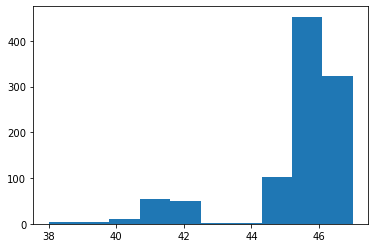

In [523]:
plt.figure()
plt.hist((np.dot((data/norms), RV.T) > 0).sum(axis=1).astype(int))
plt.show()

In [188]:
inputs = keras.Input(shape=(D, ), name='inputs')
vectors = K.constant(RV.T)
normalize =  keras.layers.Lambda(lambda v: K.l2_normalize(v, axis=1), name='L2Normalization')(inputs)
dot = keras.layers.Lambda(lambda x: K.sum(K.cast(K.dot(x, vectors)>0, "int32"), axis=1))(normalize)
model = keras.Model(inputs=inputs, outputs=dot)

In [189]:
y = model(data)

ValueError: Input 0 is incompatible with layer model_16: expected shape=(None, 9), found shape=(9, 1000)

In [170]:
y

<tf.Tensor: shape=(1000,), dtype=int32, numpy=
array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10